## 3-3. Wait and Call

- Wait을 이용해서 동적 웹 사이트를 성공적으로 스크래핑해봅시다.
- Selenium에서 사용하는 Wait은 크게 2가지가 존재한다

### Implicit / Explicit Wait

Selenium은 동적 웹 사이트에 대한 지원을 진행하기 위해 **명시적 기다림(Explicit Wait)** 과 **암묵적 기다림(Implicit Wait)** 을 지원합니다.

- Implicit Wait: 다 로딩이 될 때까지 **지정한 시간** 동안 기다림 (e.g. 다 로딩이 될 때까지 5초동안 기다려!)
- Explicit Wait: **특정 요소에 대한 제약**을 통한 기다림 (e.g. 이 태그를 가져올 수 있을 때까지 기다려!)

### Target: IndieStreet 이벤트 스크래핑

다음 사이트에 있는 행사의 이름들을 스크래핑 해봅시다 : https://indistreet.com/live?sortOption=startDate%3AASC 

해당 웹 페이지는 공연 리스트가 담긴 웹 페이지입니다.

In [1]:
# 스크래핑에 필요한 라이브러리를 불러와봅시다.

from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from webdriver_manager.chrome import ChromeDriverManager

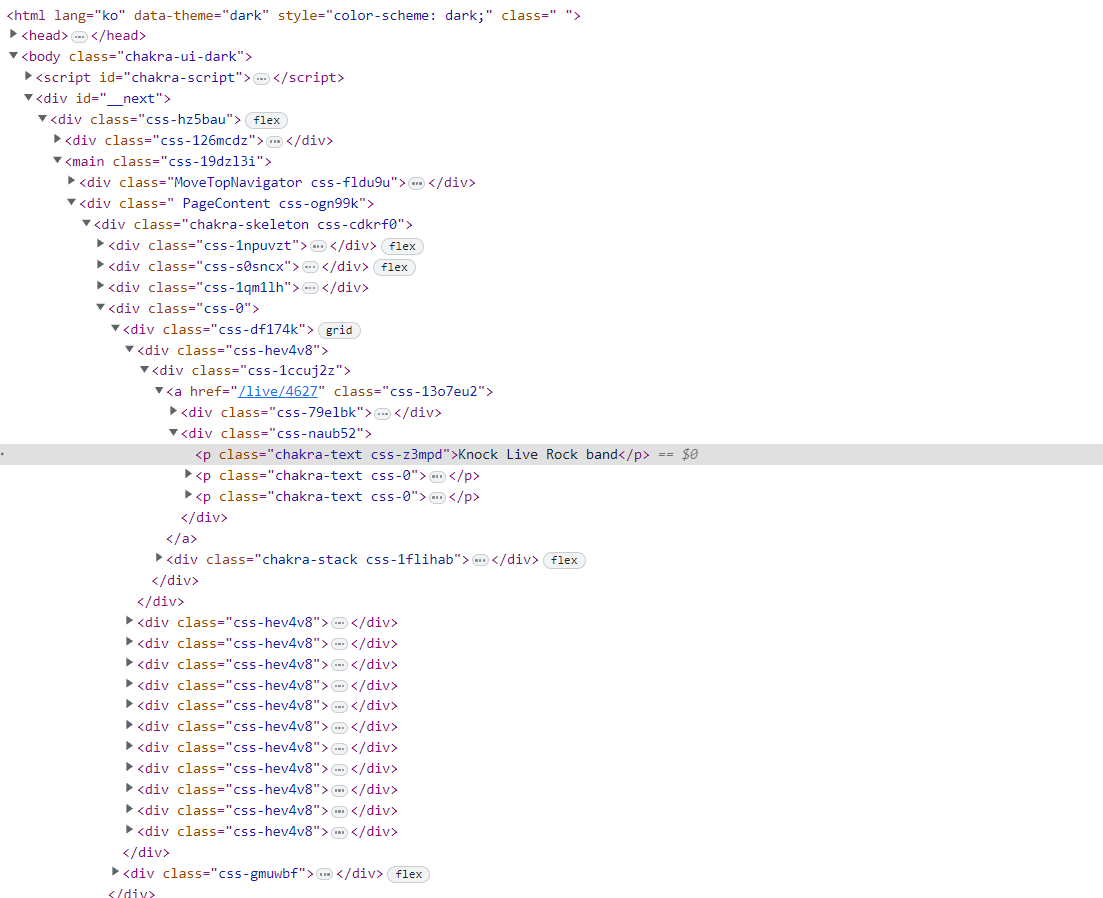

### XPath?

위 사이트를 확인해보니 class 이름이 조금 특이했습니다.  
이는 스크래핑을 방지할 목적으로 랜덤하게 class 이름을 생성하기 때문인데요,

이러한 경우에서 쓸 수 있는 방법이 여러가지가 있는데,  
그 중 한가지 방법인, **위치**를 활용한 방법을 알아보도록 하겠습니다.

`XPath`는 XML, HTML 문서 등의 요소의 위치를 경로로 표현하는 것을 의미합니다.  
마치 `데스크탑/폴더1/폴더2/음악.mp3`와 같이 말이죠!

이를 적용해서 데이터를 온전히 가져와봅시다.

Hint: 저희가 원하는 요소의 XPath는 `//*[@id="__next"]/div/main/div[2]/div/div[4]/div[1]/div[1]/div/a/div[2]/p[1]` 입니다.

In [7]:
# 예시 사이트에 요청을 진행하고, 예시 사이트의 첫 번째 이벤트의 제목을 가져와봅시다.

# 우리가 저번에 html locator를 학습했었다. 특정요소 하나를 가리키는 특정한 이름에 대한 next라는 요소가 있다.
# 이 next요소 안에 있는 div안에 있는 main,안에있는 div의 2번째 원소(html문서는 파이썬 처럼 0번째 인덱스부터 시작하는게 아니라 1번째 부터 시작한다고 한다)
# ....가서 p의 1번째 요소가 우리가 찾는 요소라는 것을 경로라는 형태로 알려주고 이것을 Xpath라고 한다.

# //*[@id="__next"]/div/main/div[2]/div/div[4]/div[1]/div[1]/div/a/div[2]/p[1]

driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))
driver.get("https://indistreet.com/live?sortOption=startDate%3AASC")
driver.find_element(By.XPATH, '//*[@id="__next"]/div/main/div[2]/div/div[4]/div[1]/div[1]/div/a/div[2]/p[1]')

NoSuchElementException: Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="__next"]/div/main/div[2]/div/div[4]/div[1]/div[1]/div/a/div[2]/p[1]"}
  (Session info: chrome=111.0.5563.65)
Stacktrace:
Backtrace:
	(No symbol) [0x00E8DCE3]
	(No symbol) [0x00E239D1]
	(No symbol) [0x00D34DA8]
	(No symbol) [0x00D6019F]
	(No symbol) [0x00D603AB]
	(No symbol) [0x00D8EE62]
	(No symbol) [0x00D7AF14]
	(No symbol) [0x00D8D57C]
	(No symbol) [0x00D7ACC6]
	(No symbol) [0x00D56F68]
	(No symbol) [0x00D580CD]
	GetHandleVerifier [0x01103832+2506274]
	GetHandleVerifier [0x01139794+2727300]
	GetHandleVerifier [0x0113E36C+2746716]
	GetHandleVerifier [0x00F36690+617600]
	(No symbol) [0x00E2C712]
	(No symbol) [0x00E31FF8]
	(No symbol) [0x00E320DB]
	(No symbol) [0x00E3C63B]
	BaseThreadInitThunk [0x761C7D69+25]
	RtlInitializeExceptionChain [0x771FB74B+107]
	RtlClearBits [0x771FB6CF+191]


오류가 발생합니다! 왜 그럴까요?

GET을 한 다음에 바로 find_element를 하려고 하면 특정 요소가 업데이트 되기전에, 
다시말해 데이터가 로딩되기 전에 find를 진행했기 때문에 그런 element는 없다는 에러가 나오게 된것이다.

이 웹 페이지는 **동적 웹페이지**이기 때문에 그렇습니다.
이 페이지를 성공적으로 스크래핑하기 위해서는 `Wait`을 사용해야합니다.

2가지 Wait 방법을 활용해서 주어진 내용을 스크래핑 해봅시다.

### Implicit Wait

`.implicitly_wait()`을 활용해서 암시적 기다림을 적용할 수 있습니다.  

주의하실 점으론, 반드시 해당 시간을 기다리는 것이 아니라, 로딩이 다 될때까지의 한계 시간의 의미를 가집니다.

In [11]:
# 10초동안 Implicit Wait을 진행하도록 해서 스크래핑이 잘 이루어지도록 수정해봅시다.

from selenium.webdriver.support.ui import WebDriverWait

with webdriver.Chrome(service=Service(ChromeDriverManager().install())) as driver:

    driver.get("https://indistreet.com/live?sortOption=startDate%3AASC")
    # 이 함수는 2가지 중에 한가지를 하게 되는대 
    # 요청이 완벽하게 되면 다음것을 실행하거나 혹은 10초를 기다린다.(10초를 항상 기다리는 것이 아니다)
    driver.implicitly_wait(10)
    
    print(driver.find_element(By.XPATH, '//*[@id="__next"]/div/main/div[2]/div/div[4]/div[1]/div[1]/div/a/div[2]/p[1]').text)


Knock Live Rock band


이제는 에러가 발생하지 않는다  
그렇다면 이제는 특정 요소가 준비가 되면 가져오라고 명령을 내릴수도 있다!  
<br>
그것이 Explicit Wait이다  

### Explicit Wait
`WebDriverWait()`과 두 메서드를 활용해서 명시적 기다림을 적용할 수 있습니다.

`until()`: 인자의 조건이 만족될 때까지  
`until_not()` 인자의 조건이 만족되지 않을 때까지  

예를 들어, id가 `target`인 요소가 존재할 때까지 기다린 후 다음 명령을 진행합니다.  
인자로는 driver와 최대 몇초기다릴 것인지 초를 인자로 받는다

```python
element = WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.ID, "target")))
```

이때, EC는 `expected_conditions`로, selenium에서 정의된 조건들입니다 (~가 존재하면, ...)  
[이곳](https://www.selenium.dev/selenium/docs/api/py/webdriver_support/selenium.webdriver.support.expected_conditions.html)에서 더 자세한 정보를 확인할 수 있습니다.

주어진 XPath가 등장할 때 까지 Wait을 진행해봅시다. (`EC.presence_of_element_located()` 활용)

In [12]:
# Explicit Wait를 활용해서 스크래핑이 잘 이루어지도록 코드를 작성해봅시다.

from selenium.webdriver.support import expected_conditions as EC

with webdriver.Chrome(service=Service(ChromeDriverManager().install())) as driver:

    driver.get("https://indistreet.com/live?sortOption=startDate%3AASC")
    
    element = WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH, '//*[@id="__next"]/div/main/div[2]/div/div[4]/div[1]/div[1]/div/a/div[2]/p[1]')))
    
    print(element.text)

Knock Live Rock band


### 여러 공연 제목 가져오기

여러 공연의 제목들을 가져오기 위해 XPath를 관찰해봅시다.  
이 페이지의 공연 제목들에 해당하는 XPath는 다음과 같습니다:

```
//*[@id="__next"]/div/main/div[2]/div/div[4]/div[1]/div[1]/div/a/div[2]/p[1]
//*[@id="__next"]/div/main/div[2]/div/div[4]/div[1]/div[2]/div/a/div[2]/p[1]
//*[@id="__next"]/div/main/div[2]/div/div[4]/div[1]/div[3]/div/a/div[2]/p[1]
...
```

이를 일반화해서 가장 먼저 등장하는 **10개**의 이름을 추출하는 코드를 작성해봅시다.

In [15]:
# 10개의 여러 공연의 제목을 implicitly_wait으로 스크래핑하는 코드를 작성해봅시다.

from selenium.webdriver.support import expected_conditions as EC

with webdriver.Chrome(service=Service(ChromeDriverManager().install())) as driver:

    driver.get("https://indistreet.com/live?sortOption=startDate%3AASC")
    for i in range(1,11):
        
        driver.implicitly_wait(10)
    
        print(driver.find_element(By.XPATH, f'//*[@id="__next"]/div/main/div[2]/div/div[4]/div[1]/div[{i}]/div/a/div[2]/p[1]').text)

Knock Live Rock band
Sign up
이디어츠 1st EP 발매기념 공연
도라페스트 4탄
NO PASARAN! Vol.1
LIVE in NOV 2019
LIVE in DEC 2019
오롯한 라이브와 함께
LIVE in FEB
2020 PUNK Marathon


In [14]:
# 10개의 여러 공연의 제목을 explicitly_wait으로 스크래핑하는 코드를 작성해봅시다.

from selenium.webdriver.support import expected_conditions as EC

with webdriver.Chrome(service=Service(ChromeDriverManager().install())) as driver:

    driver.get("https://indistreet.com/live?sortOption=startDate%3AASC")
    for i in range(1,11):
        
        element = WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH, f'//*[@id="__next"]/div/main/div[2]/div/div[4]/div[1]/div[{i}]/div/a/div[2]/p[1]')))

        print(element.text)

Knock Live Rock band
Sign up
이디어츠 1st EP 발매기념 공연
도라페스트 4탄
NO PASARAN! Vol.1
LIVE in NOV 2019
LIVE in DEC 2019
오롯한 라이브와 함께
LIVE in FEB
2020 PUNK Marathon
